<a href="https://colab.research.google.com/github/arnavt1605/Projects/blob/main/DL/MNIST_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import torch
import torch.nn as nn
import torch.optim
import torchvision
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [120]:
torch.manual_seed(0)

train_data, val_data = torch.utils.data.random_split(MNIST(root = 'data', train= True, download= True, transform= ToTensor()), [50000, 10000])
test_data = MNIST(root= "data", train= False, download=True, transform= ToTensor())

In [121]:
train_dataloader = DataLoader(train_data, shuffle= True, batch_size= 64)
val_dataloader = DataLoader(val_data, shuffle= False, batch_size= 64)
test_dataloader = DataLoader(test_data, shuffle= False, batch_size= 64)

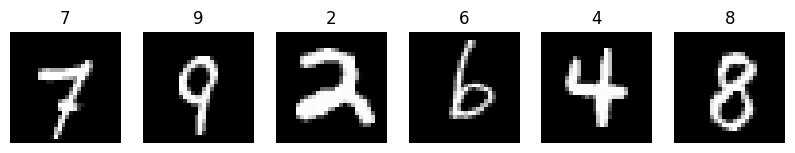

In [122]:
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(10, 2))
for i in range(6):
  plt.subplot(1, 6, i+1)
  plt.imshow(images[i].squeeze(), cmap="gray")
  plt.title(labels[i].item())
  plt.axis("off")

plt.show()

In [123]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.stack = nn.Sequential(
        nn.Linear(in_features=28*28, out_features= 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(in_features= 512, out_features= 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x= self.flatten(x)
    logits = self.stack(x)
    return logits

In [124]:
model= NeuralNet().to(device)

In [125]:
loss_function = nn.CrossEntropyLoss()

In [126]:
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

In [127]:
def train(dataloader, model, loss_function, optimizer):
  model.train()
  total_loss= 0

  for batch, (image, label) in enumerate(dataloader):
    image= image.to(device)
    label= label.to(device)

    prediction= model(image)
    loss= loss_function(prediction, label)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    total_loss+= loss

  avg_loss= total_loss / len(dataloader)
  print(f"Training Average Loss: {avg_loss:.4f}")

In [128]:
def validate(dataloader, model, loss_function):
  model.eval()
  total_loss= 0
  correct= 0
  total= 0
  with torch.no_grad():
    for image, label in dataloader:
      image= image.to(device)
      label= label.to(device)

      pred = model(image)
      loss= loss_function(pred, label)
      total_loss+= loss

      predicted_classes = pred.argmax(dim=1)
      correct+= (predicted_classes == label).sum().item()
      total+= label.size(0)

  avg_loss= total_loss / len(dataloader)
  accuracy= correct/total * 100
  print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")


In [131]:
def test(dataloader, model, loss_function):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for image, label in dataloader:
            image= image.to(device)
            label= label.to(device)

            preds = model(image)
            loss = loss_function(preds, label)
            total_loss += loss.item()

            predicted_classes = preds.argmax(dim=1)
            correct += (predicted_classes == label).sum().item()
            total += label.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total * 100
    print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

In [130]:
epochs= 5
for epoch in range(epochs):
  print(f"Epoch {epoch+1} of {epochs}:")

  train(train_dataloader, model, loss_function, optimizer)
  validate(val_dataloader, model, loss_function)

test(test_dataloader, model, loss_function)


Epoch 1 of 5:
Training Average Loss: 0.1909
Validation Loss: 0.1089, Validation Accuracy: 96.65%
Epoch 2 of 5:
Training Average Loss: 0.0903
Validation Loss: 0.0889, Validation Accuracy: 97.17%
Epoch 3 of 5:
Training Average Loss: 0.0647
Validation Loss: 0.0846, Validation Accuracy: 97.49%
Epoch 4 of 5:
Training Average Loss: 0.0519
Validation Loss: 0.0738, Validation Accuracy: 97.75%
Epoch 5 of 5:
Training Average Loss: 0.0400
Validation Loss: 0.0802, Validation Accuracy: 97.67%
 Test Loss: 0.0775, Test Accuracy: 97.63%
